In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as sts
import statistics as stats
import re

from sklearn import preprocessing

In [2]:
#Dataset PIB

df_1 = pd.read_csv('PIB-municipios.csv')
df_1.head()

,Nome do Município,PIB Agropecuária x1000,PIB Industria x1000,"PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000","PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000"
0,Belo Vale,17362.02,63196.87,51778.48,49606.95
1,Betim,12976.86,11537467.51,9924628.62,2212076.62
2,Bonfim,14592.30,9781.09,41413.59,30739.05
3,Brumadinho,22007.82,1041129.44,982042.22,255485.76
4,Cachoeira da Prata,1294.14,2271.62,18942.03,19153.61


In [3]:
#Dataset CAR

df_2 = pd.read_csv('CAR-recursos-naturais-municipios.csv')
df_2.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,Hidrografia,Manguezal,Nascentes,Reserva Legal,Restinga,Servidão Administrativa,Restrito,Vegetação Nativa,Vereda
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,948,0,412,859,0,99,0,904,24
1,Betim,2664,0,446,2,741,9,1,3,0,436,0,247,586,0,57,3,637,4
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,1291,0,383,1650,0,413,29,1507,30
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,965,0,726,1025,1,191,23,949,31
4,Cahoeira da Prata,330,0,67,0,61,1,0,1,0,61,0,28,86,0,12,0,113,0


In [4]:
#Dataset IDHM
#https://www.br.undp.org/content/brazil/pt/home/idh0/rankings/idhm-municipios-2010.html

df_3 = pd.read_csv('IDH-cidades.csv')
df_3.head()

,Nome do Município,IDH 2010,IDHM Renda 2010,IDHM Longevidade 2010,IDHM Educação 2010
0,Belo Vale,0.655,0.672,0.814,0.514
1,Betim,0.749,0.709,0.864,0.687
2,Bonfim,0.637,0.669,0.834,0.464
3,Brumadinho,0.747,0.761,0.857,0.639
4,Cachoeira da Prata,0.741,0.689,0.834,0.707


In [5]:
#dataset IBGE

df_4 = pd.read_csv('IBGE-municipios.csv')
df_4.head()

,Nome do Município,População estimada(2021),População censo(2010),Densidade demografica(2010),Salario medio mensal(2019),Pessoal ocupado(2019),Populacao ocupada(2019),Percentual da populacao com renda de ate meio salario(2010),Taxa escolarizacao 6 a 14 anos(2010),IDEB anos finais ensino fundamental(2019),...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,7723,7536,20.59,1.8,1247,16.2,38.5,97.1,6.3,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,450024,378089,1102.80,3.2,118718,27.0,33.7,98.0,6.1,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6852,6818,22.59,1.6,770,11.2,36.8,98.5,5.6,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,41208,33973,53.13,2.2,12330,30.7,33.5,98.4,6.7,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Cachoeira da Prata,3580,3654,59.53,1.6,632,17.5,31.2,98.1,6.2,...,15260.12,12455.95,25.00,NaN,2,61.381,92.6,28.6,7.2,Cerrado


In [6]:
#União dos datasets - merge com pandas

df = pd.merge(df_1, df_2, how='inner', on="Nome do Município")
df = pd.merge(df, df_3, how='inner', on="Nome do Município")
df = pd.merge(df_2, df_3, how='inner', on="Nome do Município")
df = pd.merge(df, df_4, how='inner', on="Nome do Município")
df.head()

,Nome do Município,APP,Altitude Superior 1800,Consolidada,Declividade Maior 45,Imoveis,Pousio,Topo de Morro,Banhado,Borda Chapada,...,Total receitas realizadas(2017),Total receitas empenhadas(2017),Mortalidade infantil(2019),Internacoes por diarreia(2016),Estabelecimentos SUS(2009),Area territorial(2021),Esgotamento adequado(2010),Arborização vias publicas(2010),Urbanizacao vias publicas(2010),Bioma
0,Belo Vale,4489,0,844,3,1055,47,2,3,0,...,45642.25,32123.19,10.75,0.8,5,365.923,48.2,67.7,27.8,Mata Atlântica
1,Betim,2664,0,446,2,741,9,1,3,0,...,1775733.39,1363402.09,13.06,0.1,73,343.884,86.0,74.3,33.4,Cerrado e Mata Atlântica
2,Bonfim,6133,0,1749,1,2064,41,1,0,0,...,19095.87,19887.69,NaN,NaN,4,301.865,38.5,40.9,9.4,Mata Atlântica
3,Brumadinho,7419,0,787,15,1177,44,8,1,0,...,175543.55,165401.05,17.20,0.3,27,639.434,65.4,59.3,19.5,Mata Atlântica
4,Casa Grande,3617,0,696,14,585,11,0,25,5,...,13260.00,11620.03,NaN,1.7,1,157.727,63.8,48.0,8.2,Mata Atlântica


In [7]:
#Tratamento dos dados numéricos do PIB do municipio

agropecuaria = df_1['PIB Agropecuária x1000']
industria = df_1['PIB Industria x1000']
servicos = df_1['PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000']
servicos_2 = df_1['PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000']

agropecuaria_f = []
industria_f = []
servicos_f = []
servicos_f_2 = []

for i in agropecuaria:
    agropecuaria_f.append(i)

for i in industria:
    industria_f.append(i)
    
for i in servicos:
    servicos_f.append(i)
    
for i in servicos_2:
    servicos_f_2.append(i)

In [8]:
#Tratamento dos dados numéricos do IDH dos Municipios

idh = df_3['IDH 2010']
idh_renda = df_3['IDHM Renda 2010']
idh_longevidade = df_3['IDHM Longevidade 2010']
idh_educacao = df_3['IDHM Educação 2010']

idh_f = []
idh_renda_f = []
idh_longevidade_f = []
idh_educacao_f = []

for i in idh:
    idh_f.append(float(i))

for i in idh_renda:
    idh_renda_f.append(float(i))

for i in idh_longevidade:
    idh_longevidade_f.append(float(i))
    
for i in idh_educacao:
    idh_educacao_f.append(float(i))


In [9]:
#Tratamento dos dados númericos do CAR

app = df_2['APP']
superior_1800 = df_2['Altitude Superior 1800']
consolidade = df_2['Consolidada']
declividade_maior_45 = df_2['Declividade Maior 45']
imoveis = df_2['Imoveis']
pousio = df_2['Pousio']
topo_morro = df_2['Topo de Morro']
banhado = df_2['Banhado']
borda_chapada = df_2['Borda Chapada']
hidrografia = df_2['Hidrografia']
manguezal = df_2['Manguezal']
nascentes = df_2['Nascentes']
reserva_legal = df_2['Reserva Legal']
restinga = df_2['Restinga']
servidao_administrativa = df_2['Servidão Administrativa']
restrito = df_2['Restrito']
vegetacao_nativa = df_2['Vegetação Nativa']
vereda = df_2['Vereda']
                           
app_f = []
superior_1800_f = []
consolidade_f = []
declividade_maior_45_f = []
imoveis_f = []
pousio_f = []
topo_morro_f = []
banhado_f = []
borda_chapada_f = []
hidrografia_f = []
manguezal_f = []
nascentes_f = []
reserva_legal_f = []
restinga_f = []
servidao_administrativa_f = []
restrito_f = []
vegetacao_nativa_f = []
vereda_f = []
                           
for i in app:
    app_f.append(float(i))

for i in superior_1800:
    superior_1800_f.append(float(i))
                           
for i in consolidade:
    consolidade_f.append(float(i))
                           
for i in declividade_maior_45:
    declividade_maior_45_f.append(float(i))
                           
for i in imoveis:
    imoveis_f.append(float(i))
                           
for i in pousio:
    pousio_f.append(float(i))
                           
for i in topo_morro:
    topo_morro_f.append(float(i))
                           
for i in banhado:
    banhado_f.append(float(i))
                           
for i in borda_chapada:
    borda_chapada_f.append(float(i))
                           
for i in hidrografia:
    hidrografia_f.append(float(i))
                           
for i in manguezal:
    manguezal_f.append(float(i))
                           
for i in nascentes:
    nascentes_f.append(float(i))
                           
for i in reserva_legal:
    reserva_legal_f.append(float(i))
                           
for i in restinga:
    restinga_f.append(float(i))
                           
for i in servidao_administrativa:
    servidao_administrativa_f.append(float(i))
                           
for i in restrito:
    restrito_f.append(float(i))
                           
for i in vegetacao_nativa:
    vegetacao_nativa_f.append(float(i))
                           
for i in vereda:
    vereda_f.append(float(i))
    

In [10]:
#Tratamento dos dados IBGE

populacao_estimada = df_4['População estimada(2021)']
populacao_censo = df_4['População censo(2010)']
densidade_demografica = df_4['Densidade demografica(2010)']
salario_medio = df_4['Salario medio mensal(2019)']
pessoal_ocupado = df_4['Pessoal ocupado(2019)']
populacao_ocupada = df_4['Populacao ocupada(2019)']
percentual_renda_meio_salario = df_4['Percentual da populacao com renda de ate meio salario(2010)']
taxa_escolarizacao = df_4['Taxa escolarizacao 6 a 14 anos(2010)']
IDEB_ensino_fundamental = df_4['IDEB anos finais ensino fundamental(2019)']
IDEB_ensino_medio = df_4['IDEB anos finais ensino fundamental(2019)']
docentes_ensino_fundamental = df_4['Docentes ensino fundamental(2020)']
docentes_ensino_medio = df_4['Docentes ensino medio(2020)']
numero_escolas_ensino_fundamental = df_4['Numeros estabelecimentos ensino fundamental(2010)']
numero_escolas_ensino_medio = df_4['Numeros estabelecimentos ensino medio(2020)']
pib = df_4['PIB per capita(2019)']
receitas_externas = df_4['Percentual receitas fontes externas(2015)']
IDHM = df_4['IDHM(2010)']
total_receitas_realizadas = df_4['Total receitas realizadas(2017)']
total_receitas_empenhadas = df_4['Total receitas empenhadas(2017)']
mortalidade_infantil = df_4['Mortalidade infantil(2019)']
internacoes_diarreias = df_4['Internacoes por diarreia(2016)']
SUS = df_4['Estabelecimentos SUS(2009)']
area = df_4['Area territorial(2021)']
esgotamento = df_4['Esgotamento adequado(2010)']
arborizacao = df_4['Arborização vias publicas(2010)']
urbanizacao = df_4['Urbanizacao vias publicas(2010)']
bioma = df_4['Bioma']

populacao_estimada_f = []
populacao_censo_f = []
densidade_demografica_f = []
salario_medio_f = []
pessoal_ocupado_f = []
populacao_ocupada_f = []
percentual_renda_meio_salario_f = []
taxa_escolarizacao_f = []
IDEB_ensino_fundamental_f = []
IDEB_ensino_medio_f = []
docentes_ensino_fundamental_f = []
docentes_ensino_medio_f = []
numero_escolas_ensino_fundamental_f = []
numero_escolas_ensino_medio_f = []
pib_f = []
receitas_externas_f = []
IDHM_f = []
total_receitas_realizadas_f = []
total_receitas_empenhadas_f = [] 
mortalidade_infantil_f = [] 
internacoes_diarreias_f = []
SUS_f = []
area_f = []
esgotamento_f = []
arborizacao_f = []
urbanizacao_f = []
bioma_f = [] 

for i in populacao_estimada:
    populacao_estimada_f.append(float(i))
    
for i in populacao_censo:
    populacao_censo_f.append(float(i))
    
for i in densidade_demografica:
    densidade_demografica_f.append(float(i))
    
for i in salario_medio:
    salario_medio_f.append(float(i))
    
for i in pessoal_ocupado:
    pessoal_ocupado_f.append(float(i))
    
for i in populacao_ocupada:
    populacao_ocupada_f.append(float(i))
    
for i in percentual_renda_meio_salario:
    percentual_renda_meio_salario_f.append(float(i))

for i in taxa_escolarizacao:
    taxa_escolarizacao_f.append(float(i))

for i in IDEB_ensino_fundamental:
    IDEB_ensino_fundamental_f.append(float(i))

for i in IDEB_ensino_medio:
    IDEB_ensino_medio_f.append(float(i))
    
for i in docentes_ensino_fundamental:
    docentes_ensino_fundamental_f.append(float(i))
    
for i in docentes_ensino_medio:
    docentes_ensino_medio_f.append(float(i))
    
for i in numero_escolas_ensino_fundamental:
    numero_escolas_ensino_fundamental_f.append(float(i))
    
for i in numero_escolas_ensino_medio:
    numero_escolas_ensino_medio_f.append(float(i))
    
for i in pib:
    pib_f.append(float(i))
    
for i in receitas_externas:
    receitas_externas_f.append(float(i))
    
for i in IDHM:
    IDHM_f.append(float(i))
    
for i in total_receitas_realizadas:
    total_receitas_realizadas_f .append(float(i))

for i in total_receitas_empenhadas:
    total_receitas_empenhadas_f.append(float(i))
    
for i in mortalidade_infantil:
    mortalidade_infantil_f.append(float(i))
    
for i in internacoes_diarreias:
    internacoes_diarreias_f.append(float(i))
    
for i in SUS:
    SUS_f.append(float(i))
    
for i in area:
    area_f.append(float(i))
    
for i in esgotamento:
    esgotamento_f.append(float(i))
    
for i in arborizacao:
    arborizacao_f.append(float(i))
    
for i in urbanizacao:
    urbanizacao_f.append(float(i))

le = preprocessing.LabelEncoder()
bioma_f = le.fit(df_4['Bioma'])
bioma_f = le.transform(df_4['Bioma'])


In [11]:
#aux = dimensão > 2
aux = []

for i in range(len(df_1)):
    t = []
    #PIB dos municipios
    t.append(agropecuaria_f[i])
    t.append(industria_f[i])
    t.append(servicos_f[i]) 
    t.append(servicos_f_2[i]) 
    #CAR
    t.append(app_f[i])
    t.append(superior_1800_f[i])
    t.append(consolidade_f[i])
    t.append(declividade_maior_45_f[i])
    t.append(imoveis_f[i])
    t.append(pousio_f[i])
    t.append(topo_morro_f[i])
    t.append(banhado_f[i])
    t.append(borda_chapada_f[i])
    t.append(hidrografia_f[i])
    t.append(manguezal_f[i])
    t.append(nascentes_f[i])
    t.append(reserva_legal_f[i])
    t.append(restinga[i])
    t.append(servidao_administrativa_f[i])
    t.append(restrito_f[i])
    t.append(vegetacao_nativa[i])
    t.append(vereda[i])                        
    #IDH
    t.append(idh_f[i])
    t.append(idh_renda_f[i])
    t.append(idh_longevidade_f[i])
    t.append(idh_educacao_f[i])
    #IBGE
    t.append(populacao_estimada_f[i])
    t.append(populacao_censo_f[i])
    t.append(densidade_demografica_f[i])
    t.append(salario_medio_f[i])
    t.append(pessoal_ocupado_f[i])
    t.append(populacao_ocupada_f[i])
    t.append(percentual_renda_meio_salario_f[i])
    t.append(taxa_escolarizacao_f[i])
    #t.append(IDEB_ensino_fundamental_f[i])
    #t.append(IDEB_ensino_medio_f[i])
    t.append(docentes_ensino_fundamental_f[i])
    t.append(docentes_ensino_medio_f[i])
    t.append(numero_escolas_ensino_fundamental_f[i])
    t.append(numero_escolas_ensino_medio_f[i])
    #t.append(receitas_externas_f[i])
    t.append(pib_f[i])
    t.append(IDHM_f[i])
    t.append(total_receitas_realizadas_f[i])
    t.append(total_receitas_empenhadas_f[i])
    #t.append(mortalidade_infantil_f[i])
    #t.append(internacoes_diarreias_f[i])
    t.append(SUS_f[i])
    t.append(area_f[i])
    t.append(esgotamento_f[i])
    t.append(arborizacao_f[i])
    t.append(urbanizacao_f[i])
    t.append(bioma_f[i])
    
    aux.append(t)
print(aux)

[[17362.02, 63196.87, 51778.48, 49606.95, 4489.0, 0.0, 844.0, 3.0, 1055.0, 47.0, 2.0, 3.0, 0.0, 948.0, 0.0, 412.0, 859.0, 0, 99.0, 0.0, 904, 24, 0.655, 0.672, 0.814, 0.514, 7723.0, 7536.0, 20.59, 1.8, 1247.0, 16.2, 38.5, 97.1, 68.0, 18.0, 10.0, 1.0, 24361.53, 0.655, 45642.25, 32123.19, 5.0, 365.923, 48.2, 67.7, 27.8, 3], [12976.86, 11537467.51, 9924628.62, 2212076.62, 2664.0, 0.0, 446.0, 2.0, 741.0, 9.0, 1.0, 3.0, 0.0, 436.0, 0.0, 247.0, 586.0, 0, 57.0, 3.0, 637, 4, 0.749, 0.709, 0.864, 0.687, 450024.0, 378089.0, 1102.8, 3.2, 118718.0, 27.0, 33.7, 98.0, 2812.0, 958.0, 118.0, 37.0, 63882.75, 0.749, 1775733.39, 1363402.09, 73.0, 343.884, 86.0, 74.3, 33.4, 2], [14592.3, 9781.09, 41413.59, 30739.05, 6133.0, 0.0, 1749.0, 1.0, 2064.0, 41.0, 1.0, 0.0, 0.0, 1291.0, 0.0, 383.0, 1650.0, 0, 413.0, 29.0, 1507, 30, 0.637, 0.669, 0.834, 0.464, 6852.0, 6818.0, 22.59, 1.6, 770.0, 11.2, 36.8, 98.5, 44.0, 19.0, 4.0, 1.0, 14898.51, 0.637, 19095.87, 19887.69, 4.0, 301.865, 38.5, 40.9, 9.4, 3], [22007.82, 

[[3, 11901726102069.17], [4, 1893196769385.7554], [5, 1374410242139.4312], [6, 821150904865.3381], [7, 581981447963.8538], [8, 388892771191.70935]]


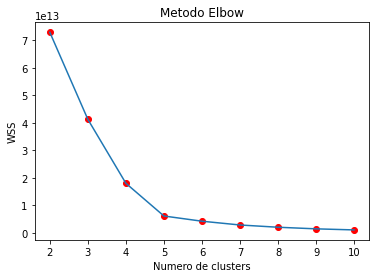

In [12]:
#Método Elbow: Encontrando um valor ideal para o número de clusters

from sklearn.cluster import KMeans
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(aux)
    #print(i, kmeans.inertia_)
    wcss.append(kmeans.inertia_)

#Cálculo da maior queda do "joelho"
diferencas = []
for j in range(2,len(wcss)):
    if j+1 != len(wcss):
        t = []
        m = wcss[j] - wcss[j+1]
        t.append(j+1)
        t.append(m)
        diferencas.append(t)

print(diferencas)
#Gráfico da variância em relação ao número de clusters
#Lembrando: maior a variância, maior a dispersão dos dados
plt.plot(range(2,11), wcss)
plt.scatter(range(2,11), wcss, c='red')
plt.title('Metodo Elbow')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

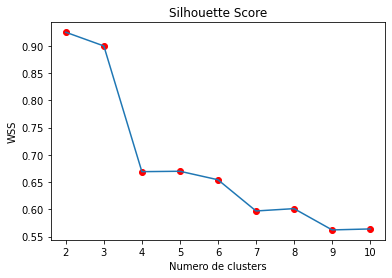

In [13]:
#Silhouette Score 
#Outro algotimo para calcular o valor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valores = []

for i in range(2,11):
    X = aux
    km = KMeans(n_clusters=i, random_state=42, init = 'k-means++')
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')

    valores.append(score)

plt.plot(range(2,11), valores)
plt.scatter(range(2,11), valores, c='red')
plt.title('Silhouette Score')
plt.xlabel('Numero de clusters')
plt.ylabel('WSS') #withim cluster sum of squares
plt.show()

In [14]:
#Caluclado o valor de k

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

valorScore = []

for i in range(2,11):
    elementoValorScore = []
    X = aux
    km = KMeans(n_clusters=i, random_state=42, init = 'k-means++')
    km.fit_predict(X)
    score = silhouette_score(X, km.labels_, metric='euclidean')
    elementoValorScore.append(i)
    elementoValorScore.append(score)
    valorScore.append(elementoValorScore)

#print(valorScore)

cont = 2
diferenca = []
for i in range(len(valorScore)+1):
    if i+1 < len(valorScore):
        delta = []
        cont = cont + 1
        delta.append(cont)
        delta.append(valorScore[i][1]-valorScore[i+1][1])
        diferenca.append(delta)

#Ordena o vetor de forma decrescente com base na diferença calculada
valorK = sorted(diferenca, key=lambda diferenca: diferenca[1], reverse=True)
#maior valor da diferenca
print(valorK[0])

[4, 0.23069177485662096]


In [15]:
#PCA = transforma de n dimensões para uma dimensão m, com n > m
#Transformando os dados de "aux" para dimensão = 2

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pcaTransformacao = pca.fit_transform(aux)

print(pcaTransformacao)


[[-1109006.06870036   -38602.27399623]
 [13827557.20690267  3938737.64110337]
 [-1153621.67052325   -76922.13055738]
 [  238944.97630961   249988.25714691]
 [-1179022.90708067   -70018.60517186]
 [-1067861.96330907   -50152.88305508]
 [-1186710.58924654   -66082.24628264]
 [ -118163.98621637   102724.51730495]
 [  269401.53211304  -603378.80466519]
 [16055899.94972643 -3699854.01057315]
 [-1139999.02560446   -87901.77875029]
 [-1167568.25108464   -67639.2050894 ]
 [ -273392.37062963  -357516.91426906]
 [-1101501.49603287   -30324.96365522]
 [-1085867.77342914   -99209.88351522]
 [ -842212.48455266  -197028.70069507]
 [-1109948.33199493  -102299.36268313]
 [-1138863.41448912   -83021.11815465]
 [-1184768.88584851   -65574.44687468]
 [   73565.16545422    25789.99522961]
 [ -810192.12722767  -151046.03569138]
 [-1149161.99330607   -65671.96828006]
 [ -196170.43840646   684876.5648498 ]
 [  656954.18478926    81970.59550413]
 [-1176314.73812079   -68104.82337343]
 [ -570604.96015665   381

In [ ]:
#Map coordenada : cidade
cidades = {}

for i in pcaTransformacao:

In [16]:
from sklearn.cluster import KMeans
import numpy as np

#Calculando os clusters dos dados na dimensão = 2
kmeans = KMeans(n_clusters = 4, random_state = 0, max_iter = 100)
cluster = kmeans.fit_predict(pcaTransformacao)

#Centroides de cada um dos clusters gerados
centroids = kmeans.cluster_centers_

print(cluster)

[0 2 0 3 0 0 0 0 3 1 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 3 3 0 3 0
 0 0 0 0 0 0 0 0 0 0 3]


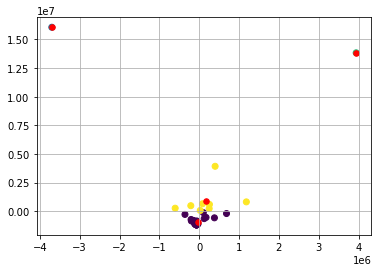

In [17]:
import matplotlib.pyplot as plt

#Plotando os dados de "aux" com base na váriavel "cluster" gerada e visualizando os centroides de cada um deles
plt.scatter(pcaTransformacao[:,1], pcaTransformacao[:,0], c=cluster)
plt.grid()
plt.scatter(centroids[:,1],centroids[:,0], s=30, c='red') #posicao do centroide do agrupamento
plt.show()


In [18]:
#Para cada centroide gerado, identificar o ponto mais próxima 
import math

coordDist = []
grupos = [0, 1, 2, 3]
pontoMaisProx = []

for g in grupos:
    for i in pcaTransformacao:
        val = []
        #Adiciona o par ordenado da posição
        val.append(i)
        x = i[0]-centroids[g][0]
        y = i[1]-centroids[g][1]
        delta = abs(pow(x,2) - pow(y,2))
        #Adiciona a distância euclidiana calculada
        val.append(math.sqrt(delta))
        coordDist.append(val)

    #Ordena o vetor de forma crescente com base na distância euclidiana calculada
    prox = sorted(coordDist, key=lambda coordDist: coordDist[1])
    #Prmeira posição = menor valor
    pontoMaisProx.append(prox[0])
    coordDist = []

#Associar cada valor do par ordenado com a cidade correspondente
for i in range(0,4):
    print(pontoMaisProx[i][0])
    
#Mostrar o nome da cidade associado ao ponto calculado
'''
Implementar aqui
'''

[-934200.79388157  -66280.73778146]
[16055899.94972643 -3699854.01057315]
[13827557.20690267  3938737.64110337]
[ 488816.94121032 -211027.9840278 ]


'\nImplementar aqui\n'

In [19]:
#Mostrar valores separados por cluster

from collections import Counter
print(Counter(cluster))


Counter({0: 38, 3: 8, 2: 1, 1: 1})


In [20]:
#Mostrar o nome das cidades por cluster

#Verificar se essa relação é correta
cidades = {
    '0':'Belo Vale',
    '1':'Betim',
    '2':'Bonfim',
    '3':'Brumadinho',
    '4':'Cachoeira da Prata',
    '5':'Caetanópolis',
    '6':'Casa Grande',
    '7':'Congonhas',
    '8':'Conselheiro Lafaiete',
    '9':'Contagem',
    '10':'Cristiano Otoni',
    '11':'Crucilândia',
    '12':'Curvelo',
    '13':'Desterro de Entre Rios',
    '14':'Entre Rios de Minas',
    '15':'Esmeraldas',
    '16':'Felixlândia',
    '17':'Florestal',
    '18':'Fortuna de Minas',
    '19':'Ibirité',
    '20':'Igarapé',
    '21':'Inhaúma',
    '22':'Itatiaiuçu',
    '23':'Itaúna',
    '24':'Itaverava',
    '25':'Jeceaba',
    '26':'Juatuba',
    '27':'Lagoa Dourada',
    '28':'Maravilhas',
    '29':'Mario Campos',
    '30':'Mateus Leme',
    '31':'Moeda',
    '32':'Ouro Branco',
    '33':'Ouro Preto',
    '34':'Papagaios',
    '35':'Pará de Minas',
    '36':'Paraopeba',
    '37':'Pequi',
    '38':'Piedade dos Gerais',
    '39':'Pompéu',
    '40':'Queluzito',
    '41':'Resende Costa',
    '42':'Rio Manso',
    '43':'São Brás do Suaçuí',
    '44':'São Joaquim de Bicas',
    '45':'São José da Varginha',
    '46':'Sarzedo',
    '47':'Sete Lagoas'
}

city = []
c0 = [] #Representa o cluster 0
c1 = [] #Representa o cluster 1
c2 = [] #Representa o cluster 2
c3 = [] #Representa o cluster 3
c4 = [] #Representa o cluster 4
c5 = [] #Representa o cluster 5
c6 = [] #Representa o cluster 6

j = 0 #Contador auxiliar para andar no vetor com os nomes das cidades

#Para cada id que representa uma cidade, eu adiciona no vetor "cidades"

for i in cidades:
    city.append(cidades[i])

#Para cada valor i do "cluster", tem-se o nome da cidade i
#Com isso, é feito um map do nome da cidade com cluster que ela pertence
for i in cluster:
    if i == 0:
        c0.append(city[j])
    elif i == 1:
        c1.append(city[j])
    elif i == 2:
        c2.append(city[j])
    elif i == 3:
        c3.append(city[j])
    elif i == 4:
        c4.append(city[j])
    elif i == 5:
        c5.append(city[j])
    elif i == 6:
        c6.append(city[j])
    
    j = j + 1
    
print(c0)
print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)



['Belo Vale', 'Bonfim', 'Cachoeira da Prata', 'Caetanópolis', 'Casa Grande', 'Congonhas', 'Cristiano Otoni', 'Crucilândia', 'Curvelo', 'Desterro de Entre Rios', 'Entre Rios de Minas', 'Esmeraldas', 'Felixlândia', 'Florestal', 'Fortuna de Minas', 'Igarapé', 'Inhaúma', 'Itatiaiuçu', 'Itaverava', 'Jeceaba', 'Juatuba', 'Lagoa Dourada', 'Maravilhas', 'Mario Campos', 'Mateus Leme', 'Moeda', 'Papagaios', 'Paraopeba', 'Pequi', 'Piedade dos Gerais', 'Pompéu', 'Queluzito', 'Resende Costa', 'Rio Manso', 'São Brás do Suaçuí', 'São Joaquim de Bicas', 'São José da Varginha', 'Sarzedo']
['Contagem']
['Betim']
['Brumadinho', 'Conselheiro Lafaiete', 'Ibirité', 'Itaúna', 'Ouro Branco', 'Ouro Preto', 'Pará de Minas', 'Sete Lagoas']
[]
[]
[]


In [71]:
#Dataset IDH

cidades = [c0, c1, c2, c3]
valores = []
c = 0
n = ["IDH 2010","IDHM Renda 2010","IDHM Longevidade 2010","IDHM Educação 2010"]
media = []

for nome in n:
    m = []
    for cluster in cidades:
        #Para i em c0, c1, c2 e c3:
        for i in cluster:
            #x recebe uma série Pandas de valores para cada cidade do cluster
            x = df_3[(df_3['Nome do Município'] == i)]
            #Para cada valor j da coluna especificada:
            for j in x[nome]:
                valores.append(float(j))

        print("Media ", nome, " cluster ", c, ": ", stats.mean(valores))
        m.append(stats.mean(valores))
        print("Mediana ", nome, " cluster ", c, ": ", stats.median(valores))
        print("Moda ", nome, " cluster ", c, ": ", stats.mode(valores))
        print("\n")
        c = c + 1
        valores = []
    media.append(m) 
    print('====================================================================================')

Media  IDH 2010  cluster  0 :  0.6803157894736842
Mediana  IDH 2010  cluster  0 :  0.6765000000000001
Moda  IDH 2010  cluster  0 :  0.672


Media  IDH 2010  cluster  1 :  0.756
Mediana  IDH 2010  cluster  1 :  0.756
Moda  IDH 2010  cluster  1 :  0.756


Media  IDH 2010  cluster  2 :  0.749
Mediana  IDH 2010  cluster  2 :  0.749
Moda  IDH 2010  cluster  2 :  0.749


Media  IDH 2010  cluster  3 :  0.745
Mediana  IDH 2010  cluster  3 :  0.7525
Moda  IDH 2010  cluster  3 :  0.747


Media  IDHM Renda 2010  cluster  4 :  0.6671052631578948
Mediana  IDHM Renda 2010  cluster  4 :  0.671
Moda  IDHM Renda 2010  cluster  4 :  0.672


Media  IDHM Renda 2010  cluster  5 :  0.745
Mediana  IDHM Renda 2010  cluster  5 :  0.745
Moda  IDHM Renda 2010  cluster  5 :  0.745


Media  IDHM Renda 2010  cluster  6 :  0.709
Mediana  IDHM Renda 2010  cluster  6 :  0.709
Moda  IDHM Renda 2010  cluster  6 :  0.709


Media  IDHM Renda 2010  cluster  7 :  0.73125
Mediana  IDHM Renda 2010  cluster  7 :  0.739
Moda  I

[[0.6803157894736842, 0.756, 0.749, 0.745], [0.6671052631578948, 0.745, 0.709, 0.73125], [0.8302105263157895, 0.832, 0.864, 0.850125], [0.5701315789473684, 0.697, 0.687, 0.665875]]


<AxesSubplot:>

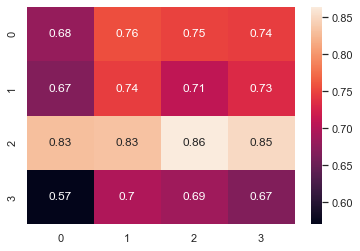

In [72]:
import seaborn as sns 
print(media)
'''
y = número do cluster
x = 0:IDH 2010, 1:IDHM Renda 2010 , 2:IDHM Longevidade 2010 , 3:IDHM Educação 2010
'''
sns.heatmap(media, annot=True)

In [38]:
#Dataset CAR

cidades = [c0, c1, c2, c3]
valores = []
c = 0
n = ["APP","Altitude Superior 1800","Consolidada","Declividade Maior 45","Imoveis","Pousio","Topo de Morro","Banhado","Borda Chapada","Hidrografia","Manguezal","Nascentes","Reserva Legal","Restinga","Servidão Administrativa","Restrito","Vegetação Nativa","Vereda"]
media = []

for nome in n:
    m = []
    for cluster in cidades:
        #Para i em c0, c1, c2 e c3:
        for i in cluster:
            #x recebe uma série Pandas de valores para cada cidade do cluster
            x = df_2[(df_2['Nome do Município'] == i)]
            #Para cada valor j da coluna especificada:
            for j in x[nome]:
                valores.append(float(j))

        print("Media ", nome, " cluster ", c, ": ", stats.mean(valores))
        m.append(stats.mean(valores))
        print("Mediana ", nome, " cluster ", c, ": ", stats.median(valores))
        print("Moda ", nome, " cluster ", c, ": ", stats.mode(valores))
        print("\n")
        c = c + 1
        valores = []
    media.append(m)
    print('====================================================================================')


Media  APP  cluster  0 :  4064.029411764706
Mediana  APP  cluster  0 :  3638.0
Moda  APP  cluster  0 :  4489.0


Media  APP  cluster  1 :  625.0
Mediana  APP  cluster  1 :  625.0
Moda  APP  cluster  1 :  625.0


Media  APP  cluster  2 :  2664.0
Mediana  APP  cluster  2 :  2664.0
Moda  APP  cluster  2 :  2664.0


Media  APP  cluster  3 :  5249.125
Mediana  APP  cluster  3 :  5427.0
Moda  APP  cluster  3 :  7419.0


Media  Altitude Superior 1800  cluster  4 :  0.029411764705882353
Mediana  Altitude Superior 1800  cluster  4 :  0.0
Moda  Altitude Superior 1800  cluster  4 :  0.0


Media  Altitude Superior 1800  cluster  5 :  0.0
Mediana  Altitude Superior 1800  cluster  5 :  0.0
Moda  Altitude Superior 1800  cluster  5 :  0.0


Media  Altitude Superior 1800  cluster  6 :  0.0
Mediana  Altitude Superior 1800  cluster  6 :  0.0
Moda  Altitude Superior 1800  cluster  6 :  0.0


Media  Altitude Superior 1800  cluster  7 :  0.0
Mediana  Altitude Superior 1800  cluster  7 :  0.0
Moda  Altitude 

Media  Vegetação Nativa  cluster  64 :  856.6764705882352
Mediana  Vegetação Nativa  cluster  64 :  718.0
Moda  Vegetação Nativa  cluster  64 :  904.0


Media  Vegetação Nativa  cluster  65 :  278.0
Mediana  Vegetação Nativa  cluster  65 :  278.0
Moda  Vegetação Nativa  cluster  65 :  278.0


Media  Vegetação Nativa  cluster  66 :  637.0
Mediana  Vegetação Nativa  cluster  66 :  637.0
Moda  Vegetação Nativa  cluster  66 :  637.0


Media  Vegetação Nativa  cluster  67 :  990.5
Mediana  Vegetação Nativa  cluster  67 :  1018.0
Moda  Vegetação Nativa  cluster  67 :  949.0


Media  Vereda  cluster  68 :  1023.3529411764706
Mediana  Vereda  cluster  68 :  4.0
Moda  Vereda  cluster  68 :  0.0


Media  Vereda  cluster  69 :  0.0
Mediana  Vereda  cluster  69 :  0.0
Moda  Vereda  cluster  69 :  0.0


Media  Vereda  cluster  70 :  4.0
Mediana  Vereda  cluster  70 :  4.0
Moda  Vereda  cluster  70 :  4.0


Media  Vereda  cluster  71 :  6.5
Mediana  Vereda  cluster  71 :  3.0
Moda  Vereda  cluster  

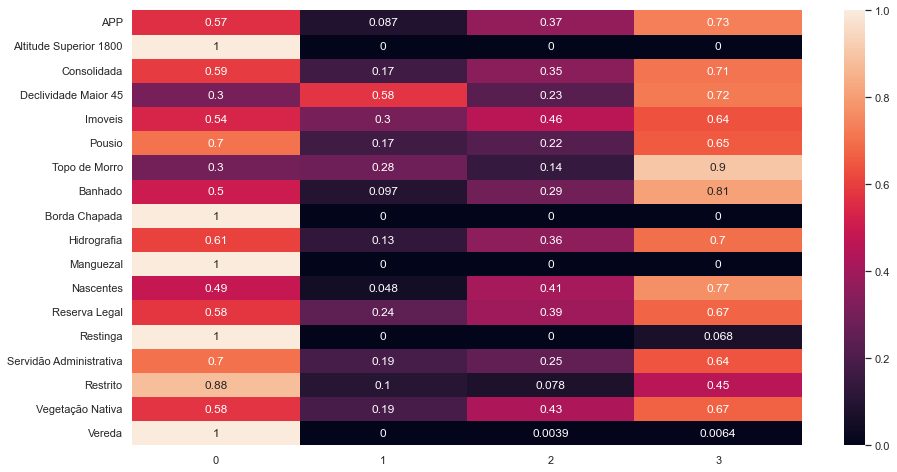

In [41]:
import numpy as np

#print(media)

media_normalizado = []

for i in media:
    media_normalizado.append(list(i/np.linalg.norm(i)))
'''
y = número do cluster
x = 
'''
y = ["APP","Altitude Superior 1800","Consolidada","Declividade Maior 45","Imoveis","Pousio","Topo de Morro","Banhado","Borda Chapada","Hidrografia","Manguezal","Nascentes","Reserva Legal","Restinga","Servidão Administrativa","Restrito","Vegetação Nativa","Vereda"]

sns.heatmap(media_normalizado, yticklabels=y, annot=True)
sns.set(rc = {'figure.figsize':(15,8)})

In [76]:
#Dataset PIB

cidades = [c0, c1, c2, c3]
valores = []
c = 0
n = ["PIB Agropecuária x1000","PIB Industria x1000","PIB Serviços (sem educação, defesa, educação e saúde publicas e seguridade social) x1000","PIB Serviços Educação, defesa, educação e saúde publicas e seguridade social x1000"]
media = []

for nome in n:
    m = []
    for cluster in cidades:
        #Para i em c0, c1, c2 e c3:
        for i in cluster:
            #x recebe uma série Pandas de valores para cada cidade do cluster
            x = df_1[(df_1['Nome do Município'] == i)]
            #Para cada valor j da coluna especificada:
            for j in x[nome]:
                valores.append(float(j))

        print("Media ", nome, " cluster ", c, ": ", stats.mean(valores))
        m.append(stats.mean(valores))
        print("Mediana ", nome, " cluster ", c, ": ", stats.median(valores))
        print("Moda ", nome, " cluster ", c, ": ", stats.mode(valores))
        print("\n")
        c = c + 1
        valores = []
    media.append(m)
    print('====================================================================================')

Media  PIB Agropecuária x1000  cluster  0 :  25789.321052631578
Mediana  PIB Agropecuária x1000  cluster  0 :  14187.83
Moda  PIB Agropecuária x1000  cluster  0 :  17362.02


Media  PIB Agropecuária x1000  cluster  1 :  2101.56
Mediana  PIB Agropecuária x1000  cluster  1 :  2101.56
Moda  PIB Agropecuária x1000  cluster  1 :  2101.56


Media  PIB Agropecuária x1000  cluster  2 :  12976.86
Mediana  PIB Agropecuária x1000  cluster  2 :  12976.86
Moda  PIB Agropecuária x1000  cluster  2 :  12976.86


Media  PIB Agropecuária x1000  cluster  3 :  25482.87875
Mediana  PIB Agropecuária x1000  cluster  3 :  21010.135000000002
Moda  PIB Agropecuária x1000  cluster  3 :  22007.82


Media  PIB Industria x1000  cluster  4 :  134653.68342105264
Mediana  PIB Industria x1000  cluster  4 :  18746.765
Moda  PIB Industria x1000  cluster  4 :  63196.87


Media  PIB Industria x1000  cluster  5 :  6425590.04
Mediana  PIB Industria x1000  cluster  5 :  6425590.04
Moda  PIB Industria x1000  cluster  5 :  6425

[[25789.321052631578, 2101.56, 12976.86, 25482.87875], [134653.68342105264, 6425590.04, 11537467.51, 1319365.80625], [162927.4039473684, 15975976.33, 9924628.62, 1514900.01375], [81466.53342105263, 2843742.32, 2212076.62, 508233.5525]]


<AxesSubplot:>

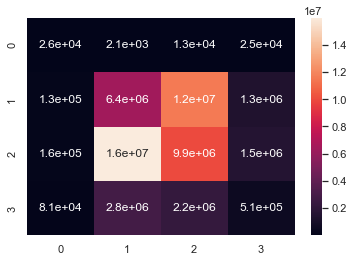

In [77]:
import seaborn as sns 
print(media)
'''
y = número do cluster
x = 
'''
sns.heatmap(media, annot=True)

In [21]:
#Dataset IBGE

cidades = [c0, c1, c2, c3]
valores = []
c = 0
n = ["População estimada(2021)","População censo(2010)","Densidade demografica(2010)","Salario medio mensal(2019)","Pessoal ocupado(2019)","Populacao ocupada(2019)","Percentual da populacao com renda de ate meio salario(2010)","Taxa escolarizacao 6 a 14 anos(2010)","IDEB anos finais ensino fundamental(2019)","IDEB anos finais ensino fundamental(2019)","Matriculas ensino fundamental(2020)","Matriculas ensino medio(2020)","Docentes ensino fundamental(2020)","Docentes ensino medio(2020)","Numeros estabelecimentos ensino fundamental(2010)","Numeros estabelecimentos ensino medio(2020)","PIB per capita(2019)","Percentual receitas fontes externas(2015)","IDHM(2010)","Total receitas realizadas(2017)","Total receitas empenhadas(2017)","Mortalidade infantil(2019)","Internacoes por diarreia(2016)","Estabelecimentos SUS(2009)","Area territorial(2021)","Esgotamento adequado(2010)","Arborização vias publicas(2010)","Urbanizacao vias publicas(2010)","Bioma"]
media = []

for nome in n:
    m = []
    for cluster in cidades:
        #Para i em c0, c1, c2 e c3:
        for i in cluster:
            #x recebe uma série Pandas de valores para cada cidade do cluster
            x = df_4[(df_4['Nome do Município'] == i)]
            #Para cada valor j da coluna especificada:
            for j in x[nome]:
                valores.append(float(j))

        print("Media ", nome, " cluster ", c, ": ", stats.mean(valores))
        m.append(stats.mean(valores))
        print("Mediana ", nome, " cluster ", c, ": ", stats.median(valores))
        print("Moda ", nome, " cluster ", c, ": ", stats.mode(valores))
        print("\n")
        c = c + 1
        valores = []
    media.append(m)
    print('====================================================================================')

Media  População estimada(2021)  cluster  0 :  17164.21052631579
Mediana  População estimada(2021)  cluster  0 :  7918.0
Moda  População estimada(2021)  cluster  0 :  7723.0


Media  População estimada(2021)  cluster  1 :  673849.0
Mediana  População estimada(2021)  cluster  1 :  673849.0
Moda  População estimada(2021)  cluster  1 :  673849.0


Media  População estimada(2021)  cluster  2 :  450024.0
Mediana  População estimada(2021)  cluster  2 :  450024.0
Moda  População estimada(2021)  cluster  2 :  450024.0


Media  População estimada(2021)  cluster  3 :  108685.0
Mediana  População estimada(2021)  cluster  3 :  95035.5
Moda  População estimada(2021)  cluster  3 :  41208.0


Media  População censo(2010)  cluster  4 :  14965.131578947368
Mediana  População censo(2010)  cluster  4 :  7349.5
Moda  População censo(2010)  cluster  4 :  7536.0


Media  População censo(2010)  cluster  5 :  603442.0
Mediana  População censo(2010)  cluster  5 :  603442.0
Moda  População censo(2010)  cluster 

Media  Matriculas ensino medio(2020)  cluster  44 :  656.2631578947369
Mediana  Matriculas ensino medio(2020)  cluster  44 :  301.5
Moda  Matriculas ensino medio(2020)  cluster  44 :  238.0


Media  Matriculas ensino medio(2020)  cluster  45 :  20760.0
Mediana  Matriculas ensino medio(2020)  cluster  45 :  20760.0
Moda  Matriculas ensino medio(2020)  cluster  45 :  20760.0


Media  Matriculas ensino medio(2020)  cluster  46 :  15721.0
Mediana  Matriculas ensino medio(2020)  cluster  46 :  15721.0
Moda  Matriculas ensino medio(2020)  cluster  46 :  15721.0


Media  Matriculas ensino medio(2020)  cluster  47 :  3564.375
Mediana  Matriculas ensino medio(2020)  cluster  47 :  3333.0
Moda  Matriculas ensino medio(2020)  cluster  47 :  1200.0


Media  Docentes ensino fundamental(2020)  cluster  48 :  127.39473684210526
Mediana  Docentes ensino fundamental(2020)  cluster  48 :  65.0
Moda  Docentes ensino fundamental(2020)  cluster  48 :  44.0


Media  Docentes ensino fundamental(2020)  cluste

Media  Estabelecimentos SUS(2009)  cluster  92 :  7.447368421052632
Mediana  Estabelecimentos SUS(2009)  cluster  92 :  5.0
Moda  Estabelecimentos SUS(2009)  cluster  92 :  2.0


Media  Estabelecimentos SUS(2009)  cluster  93 :  170.0
Mediana  Estabelecimentos SUS(2009)  cluster  93 :  170.0
Moda  Estabelecimentos SUS(2009)  cluster  93 :  170.0


Media  Estabelecimentos SUS(2009)  cluster  94 :  73.0
Mediana  Estabelecimentos SUS(2009)  cluster  94 :  73.0
Moda  Estabelecimentos SUS(2009)  cluster  94 :  73.0


Media  Estabelecimentos SUS(2009)  cluster  95 :  38.25
Mediana  Estabelecimentos SUS(2009)  cluster  95 :  35.5
Moda  Estabelecimentos SUS(2009)  cluster  95 :  27.0


Media  Area territorial(2021)  cluster  96 :  441.5781052631579
Mediana  Area territorial(2021)  cluster  96 :  240.623
Moda  Area territorial(2021)  cluster  96 :  365.923


Media  Area territorial(2021)  cluster  97 :  194.746
Mediana  Area territorial(2021)  cluster  97 :  194.746
Moda  Area territorial(2021)

ValueError: could not convert string to float: 'Mata Atlântica'

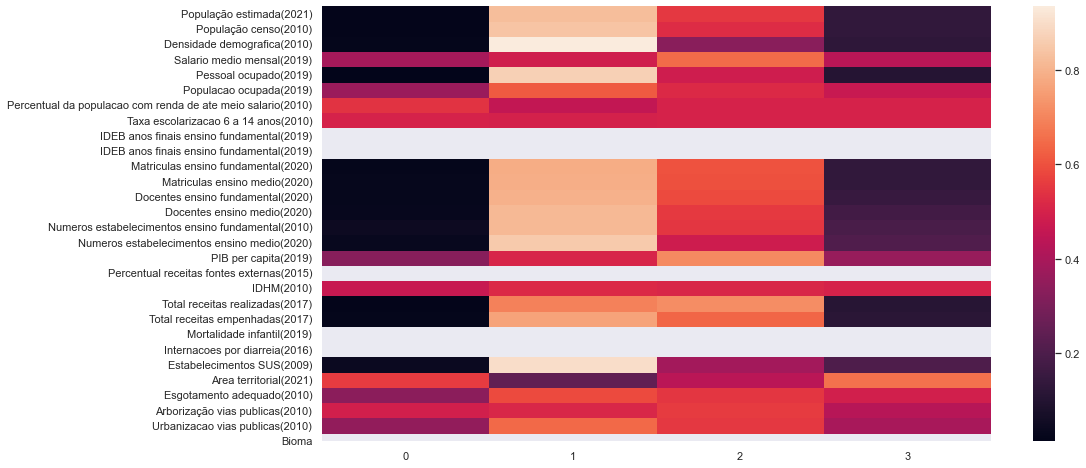

In [36]:
import seaborn as sns 
import numpy as np

#print(media)

media_normalizado = []

for i in media:
    media_normalizado.append(list(i/np.linalg.norm(i)))

'''
y = número do cluster
x = 
'''

#sns.heatmap(mm, annot=True)
y = ["População estimada(2021)","População censo(2010)","Densidade demografica(2010)","Salario medio mensal(2019)","Pessoal ocupado(2019)","Populacao ocupada(2019)","Percentual da populacao com renda de ate meio salario(2010)","Taxa escolarizacao 6 a 14 anos(2010)","IDEB anos finais ensino fundamental(2019)","IDEB anos finais ensino fundamental(2019)","Matriculas ensino fundamental(2020)","Matriculas ensino medio(2020)","Docentes ensino fundamental(2020)","Docentes ensino medio(2020)","Numeros estabelecimentos ensino fundamental(2010)","Numeros estabelecimentos ensino medio(2020)","PIB per capita(2019)","Percentual receitas fontes externas(2015)","IDHM(2010)","Total receitas realizadas(2017)","Total receitas empenhadas(2017)","Mortalidade infantil(2019)","Internacoes por diarreia(2016)","Estabelecimentos SUS(2009)","Area territorial(2021)","Esgotamento adequado(2010)","Arborização vias publicas(2010)","Urbanizacao vias publicas(2010)","Bioma"]
sns.heatmap(media_normalizado, yticklabels=y)
sns.set(rc = {'figure.figsize':(15,8)})
